In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields, fetch_header
from lumfn         import multifield_lumfn
from astropy.table import Table

In [4]:
n8 = Table.read(findfile(ftype='ddp_n8'))
n8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
55188,587722982814187660,180.82655947,-0.39458166,18.46422,0.25672,4,G12_Y1_ND8_031,6,21.206772,19.584589,18.446634,17.97138,17.72121,0.25672,917.8466870621888,39.81385072341665,G12,0,0,-730.2576298489741,-10.535561971539122,-5.029703976591031,730.3073889208534,5.443332547325564,-5.830073685156636,1.1379547,18.46422,0.7607404258942744,0,5,0.04887595303406436,0.4260902390533346,0.27640192701242194,0.749702483670456,0.6646541552560284,0.8,-0.24901842,-0.20537601,-21.377014187623324,-21.420656589318575,-21.626032603432,39.841234234620394,40.09025265042907,39.884876636315646,-0.01583765366376648,0.3047684424571552,0.20088722469843462,0.5699437321708185,-21.301499485309336,1.3357792,0.41656522368805204,0.0,-6.46422,0.015843664127987742,0.0,27306794.654809795,1 .. 0,1 .. 0,25296.0,1.0,0.6965319826189821,380950,29.981821901565855,1.0,0.7012996482542835,40,0,0,2.057072186862452,6
278732,587726031691317538,133.47427045,0.92585357,18.429876,0.10815,4,G09_Y1_DN2_161,6,20.990864,19.358027,18.368195,17.947943,17.637024,0.10815,351.7923973276524,37.731432247887966,G9,0,0,-218.39253472524186,230.3447880145794,5.1296610471387325,216.7865585300106,-231.8620055037295,4.892080964056602,0.9898319,18.429876,0.9688495770491049,0,6,-0.09239964592949461,-0.07141729854012292,0.13794395924939717,0.3208821741578874,0.8068937095299864,0.8,-0.1049055,-0.08652,-19.334594378614682,-19.352979878330487,-19.439499879622716,37.76447070612933,37.869376207137364,37.782856205845135,-0.09743395784760353,-0.08586773220326212,0.11929092051459758,0.17930755751040117,-19.31594133987988,1.3701229,0.18856443378994245,0.0,-6.4298763,0.006182943374310169,0.0,2948326.223824587,0 .. 0,1 .. 0,25588.0,1.0,0.7703974668072231,361829,11.018197372357909,1.0,0.6144594058418834,70,98,0,4.349876327009291,8
3609417,587729150913216637,134.52787406,-1.36362038,18.398266,0.18092,4,G09_Y4_207_244,6,20.461782,19.233057,18.310143,17.828026,17.603497,0.18092,617.793758703047,38.95421758251315,G9,0,0,-366.75557601074127,372.85017788630597,-12.449528045812439,364.13297095286447,-375.3984434846844,-12.848600223403427,0.9229145,18.398266,0.746638784233803,0,5,-0.026495373335477412,0.14978034743560237,0.20006894095644434,0.4681674865719224,0.6548159593894047,0.8,-0.1754924,-0.144736,-20.580528278955132,-20.611284677990586,-20.75602068484655,38.978794117578175,39.154286523469594,39.00955051661363,-0.05453841031099389,0.09301790128337362,0.16218646805120723,0.3581931909970369,-20.542645806049894,1.4017334,0.3152441029277089,0.0,-6.398266,0.010970171585470818,0.0,12682008.723311

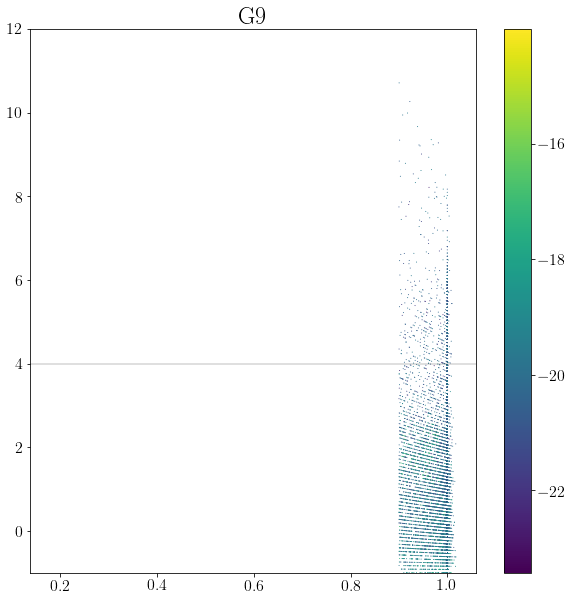

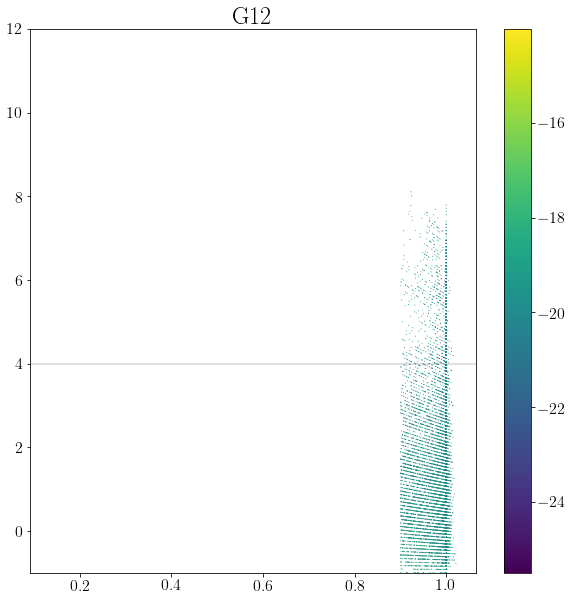

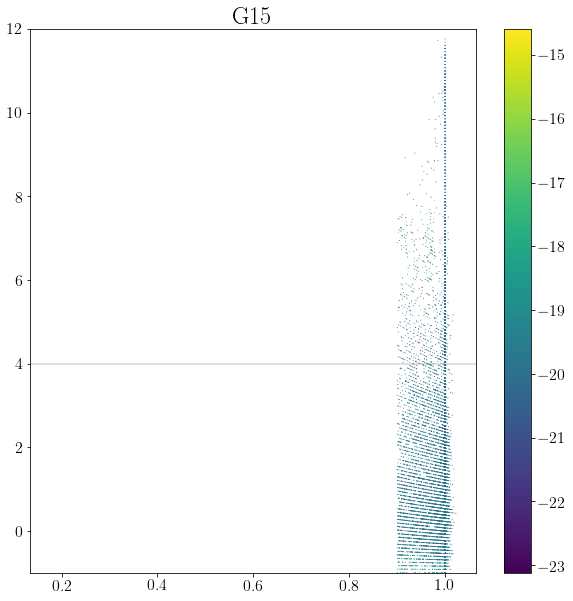

In [6]:
for field in ['G9', 'G12', 'G15']:
    isin = (n8['FIELD'] == field)

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(4., c='k', lw=0.25)
    pl.scatter(n8['FILLFACTOR'][isin], n8['DDP1_DELTA8'][isin], marker='.', lw=0.0, c=n8['MCOLOR_0P0'][isin], s=4)
    # pl.xlim(0.75,1.1)
    pl.ylim(-1., 12.)
    pl.title(field)
    pl.colorbar()
    pl.show()

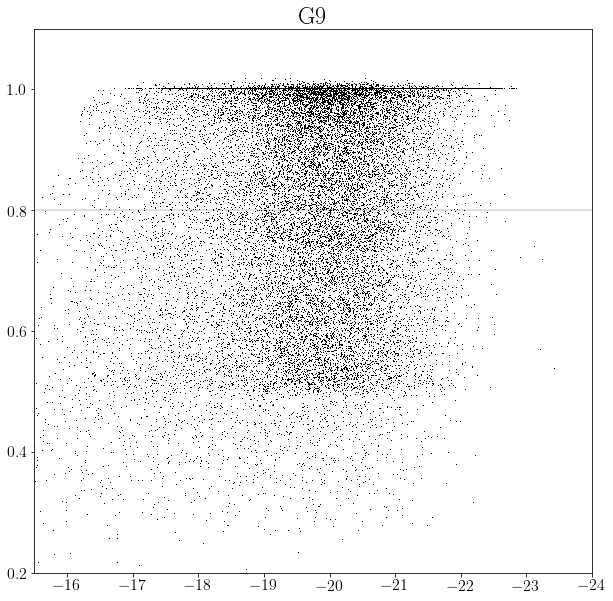

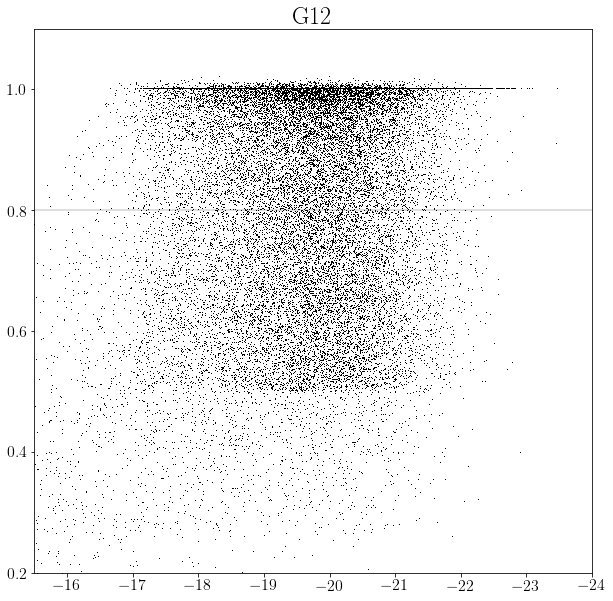

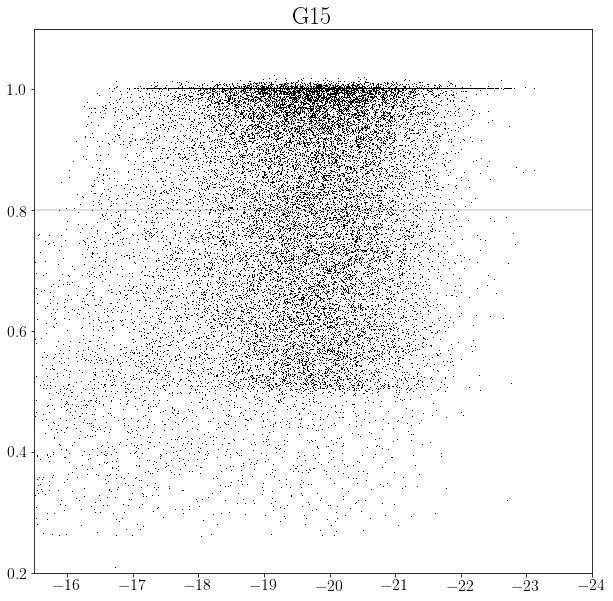

In [8]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(0.8, c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['FILLFACTOR'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5,-24.)
    pl.ylim(0.2, 1.1)
    pl.title(field)
    pl.show()

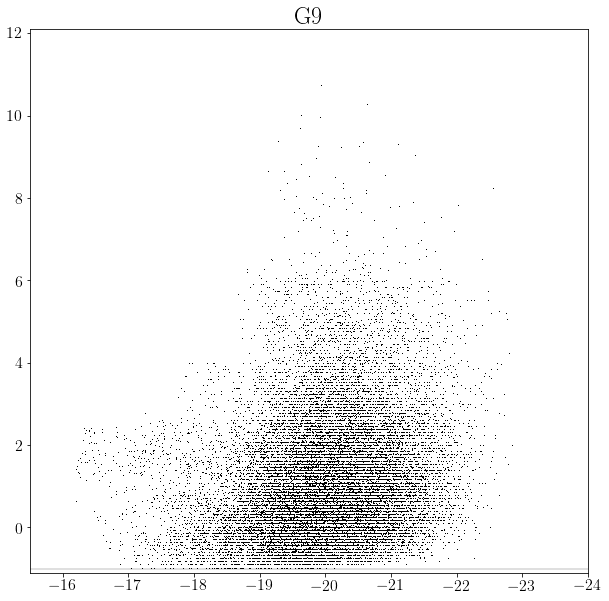

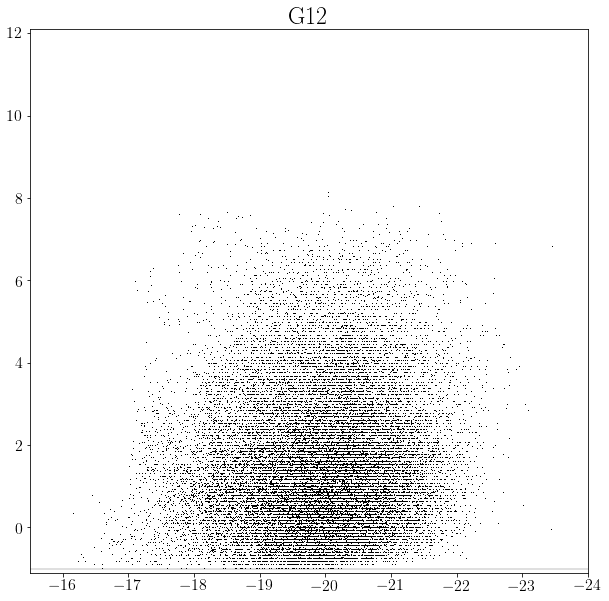

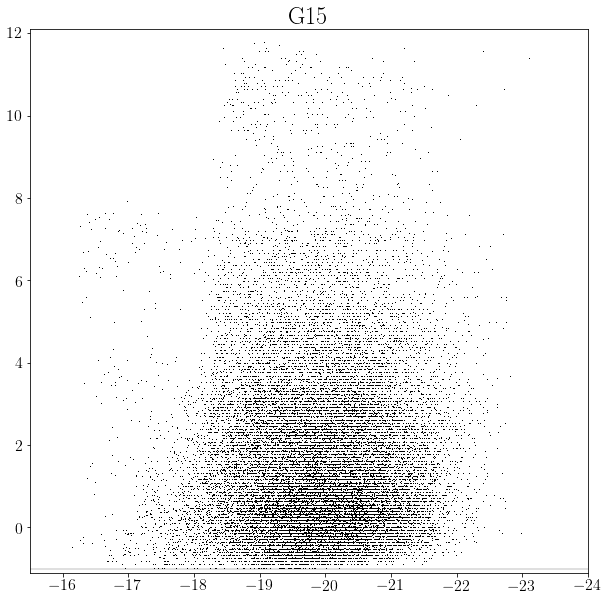

In [9]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(-1., c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5, -24.)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.show()

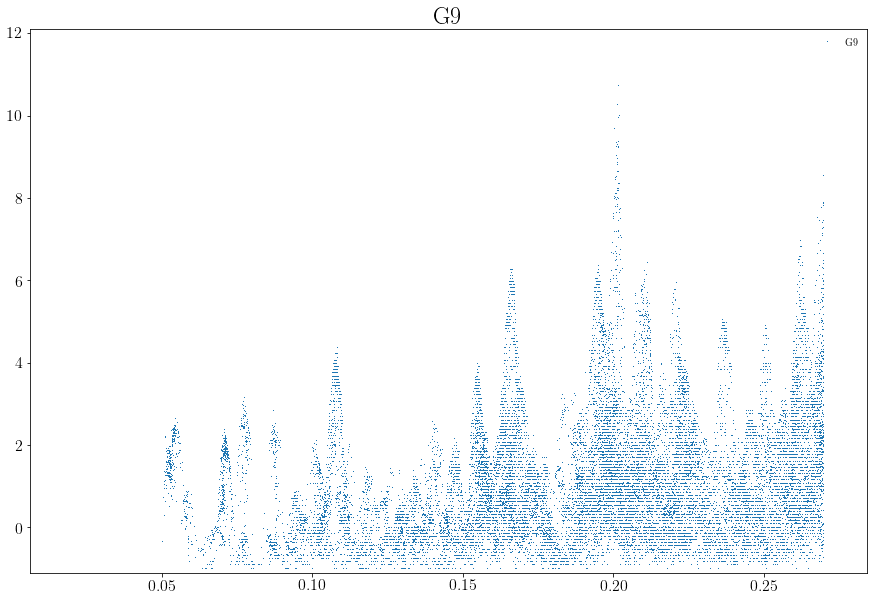

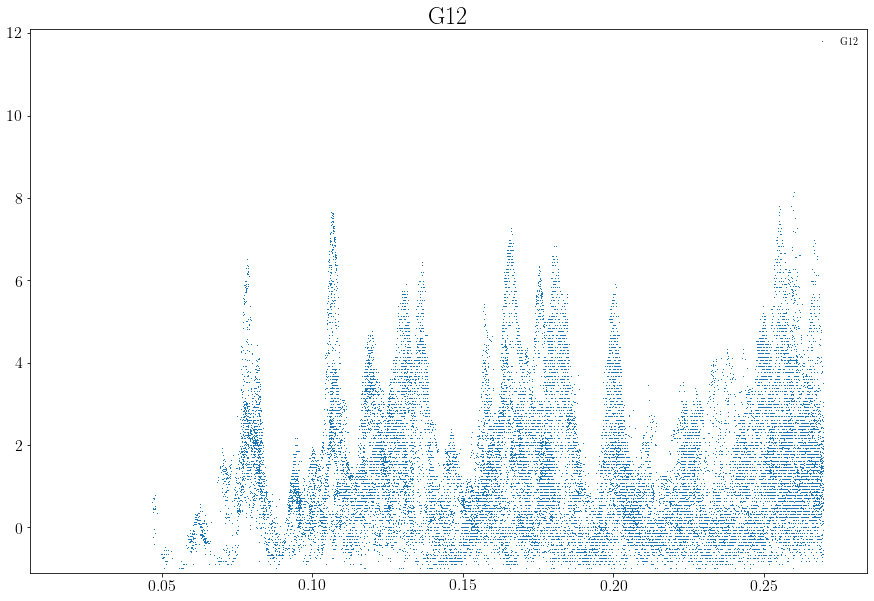

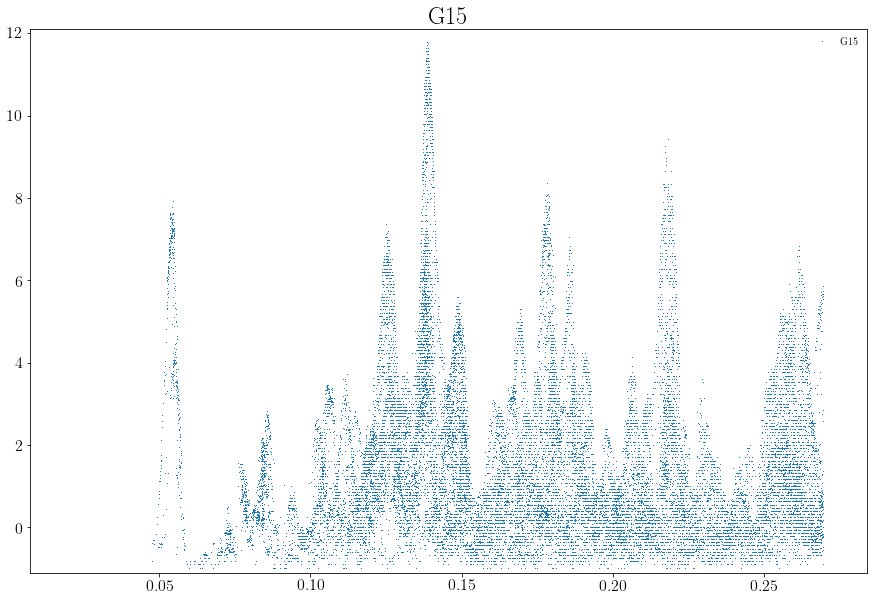

In [10]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(15,10))
    
    pl.sca(ax)
    
    pl.plot(n8['ZSURV'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, label=field)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.legend(frameon=False)

# Done.